Sheet Names: ['Sheet1']
      MJD(days)  PT-TT（s）
0  52473.159477  0.012398
1  52485.966358  0.016320
2  52497.096597  0.020257
3  52501.153015  0.021628
4  52516.081819  0.028444


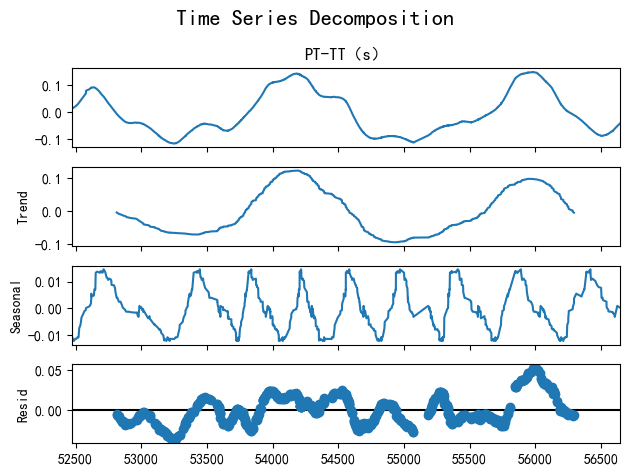

NameError: name 'stl_result' is not defined

In [15]:
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

plt.rcParams['font.sans-serif'] = ['SimHei']  # 设置中文显示
plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题

# 加载数据
file_path = '问题一未划分数据.xlsx'
excel_data = pd.ExcelFile(file_path)

# 检查数据结构
print("Sheet Names:", excel_data.sheet_names)

# 读取数据
data = excel_data.parse('Sheet1')

# 查看数据前几行
print(data.head())

# 按时间排序确保时序正确
data_sorted = data.sort_values(by='MJD(days)')

# 将时间设置为索引
data_sorted.set_index('MJD(days)', inplace=True)

# 使用加法模型进行时间序列分解，假设周期为30
result = seasonal_decompose(data_sorted['PT-TT（s）'], model='additive', period=90)

# 绘制分解结果
result.plot()
plt.suptitle('Time Series Decomposition', fontsize=16)
plt.tight_layout()
plt.show()

import numpy as np
from scipy.signal import periodogram
from statsmodels.stats.diagnostic import acorr_ljungbox

# 提取季节性周期验证的数据
residuals = stl_result.resid.dropna()

# 1. 使用频谱分析确认周期性
frequencies, power = periodogram(data_sorted['PT-TT（s）'], fs=1)  # fs=1假设等间隔采样
plt.figure(figsize=(10, 6))
plt.plot(frequencies, power)
plt.title('Periodogram for Frequency Analysis')
plt.xlabel('Frequency')
plt.ylabel('Power Spectrum')
plt.grid()
plt.show()

# 2. 对残差部分进行白噪声检验（Ljung-Box检验）
ljung_box_result = acorr_ljungbox(residuals, lags=[10], return_df=True)  # 检测前10个滞后的自相关性
ljung_box_result


Sheet Names: ['Sheet1']
      MJD(days)  PT-TT（s）
0  52473.159477  0.012398
1  52485.966358  0.016320
2  52497.096597  0.020257
3  52501.153015  0.021628
4  52516.081819  0.028444


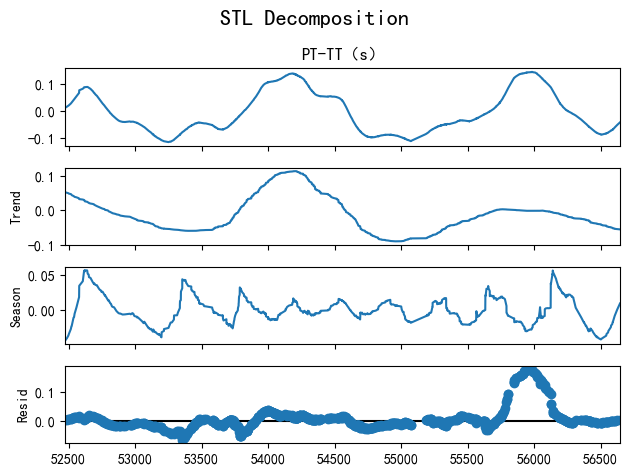

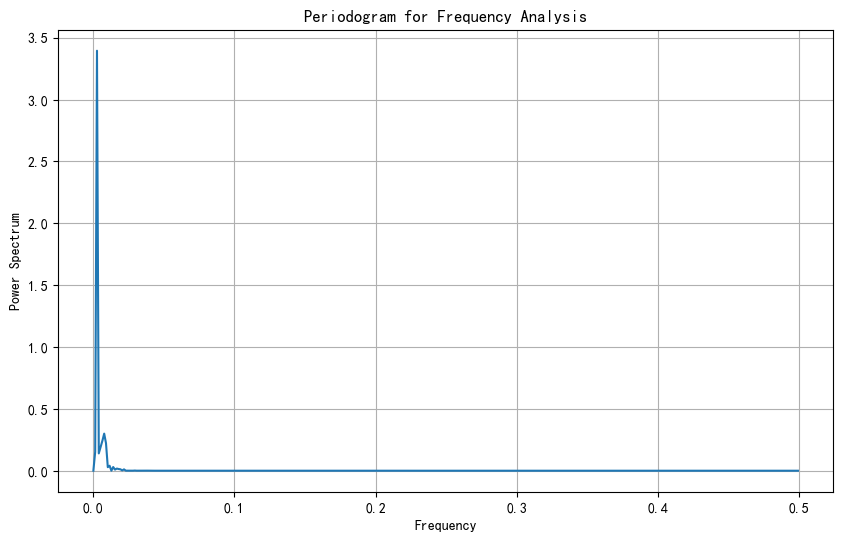

Ljung-Box Test Result:
       lb_stat  lb_pvalue
10  7165.59285        0.0


In [16]:
import pandas as pd
from statsmodels.tsa.seasonal import STL
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import periodogram
from statsmodels.stats.diagnostic import acorr_ljungbox

plt.rcParams['font.sans-serif'] = ['SimHei']  # 设置中文显示
plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题

# 加载数据
file_path = '问题一未划分数据.xlsx'
excel_data = pd.ExcelFile(file_path)

# 检查数据结构
print("Sheet Names:", excel_data.sheet_names)

# 读取数据
data = excel_data.parse('Sheet1')

# 查看数据前几行
print(data.head())

# 按时间排序确保时序正确
data_sorted = data.sort_values(by='MJD(days)')

# 将时间设置为索引
data_sorted.set_index('MJD(days)', inplace=True)

# 使用 STL 分解进行时间序列分析（假设周期为90）
stl = STL(data_sorted['PT-TT（s）'], period=90, robust=True)  # robust=True减少异常值干扰
stl_result = stl.fit()

# 绘制分解结果
stl_result.plot()
plt.suptitle('STL Decomposition', fontsize=16)
plt.tight_layout()
plt.show()

# 提取残差部分
residuals = stl_result.resid.dropna()

# 1. 使用频谱分析确认周期性
frequencies, power = periodogram(data_sorted['PT-TT（s）'], fs=1)  # fs=1假设等间隔采样
plt.figure(figsize=(10, 6))
plt.plot(frequencies, power)
plt.title('Periodogram for Frequency Analysis')
plt.xlabel('Frequency')
plt.ylabel('Power Spectrum')
plt.grid()
plt.show()

# 2. 对残差部分进行白噪声检验（Ljung-Box检验）
ljung_box_result = acorr_ljungbox(residuals, lags=[10], return_df=True)  # 检测前10个滞后的自相关性
print("Ljung-Box Test Result:")
print(ljung_box_result)
